In [1]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
import numpy as np
import os
import matplotlib.pyplot as plt
# from tqdm import tqdm
import cv2
import skimage
import itertools

/home/ubuntu/DATN_Code_DatNT/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/DATN_Code_DatNT/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/DATN_Code_DatNT/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/DATN_Code_DatNT/lib/python3.6/site-packages/tensorf

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.gca().set_ylim(len(cm)-0.5, -0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from tensorflow.keras.models import load_model
model = load_model('./custom_final.hdf5')

In [14]:
# data_path = 'preprocessed_data'
test_path = '/home/ubuntu/DATN_Code_DatNT/OCT2017/OCT_TXL/test2'
image_size = 128
batch_size = 1 #so luong anh tinh toan
num_classes = 4 #4 folder voi du lieu

pred_datagen = ImageDataGenerator(rescale=1./255)

pred_generator = pred_datagen.flow_from_directory(test_path, target_size=(image_size, image_size),
                                                  batch_size=1,
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  shuffle = False)   
pred_generator.reset()
# print(pred_generator.class_indices)
# print(pred_generator.classes)
y_pred = model.predict_generator(pred_generator,steps = pred_generator.samples // batch_size)
Y_test = pred_generator.classes[pred_generator.index_array]
# Y_pred = np.argmax(y_pred, axis=-1)
Y_pred = np.argmax(y_pred, axis = 1)


Found 200 images belonging to 4 classes.


--------------------
| Confusion Matrix |
--------------------

 [[50  0  0  0]
 [ 0 50  0  0]
 [ 1  0 49  0]
 [ 0  0  0 50]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      1.00      1.00        50
           2       1.00      0.98      0.99        50
           3       1.00      1.00      1.00        50

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



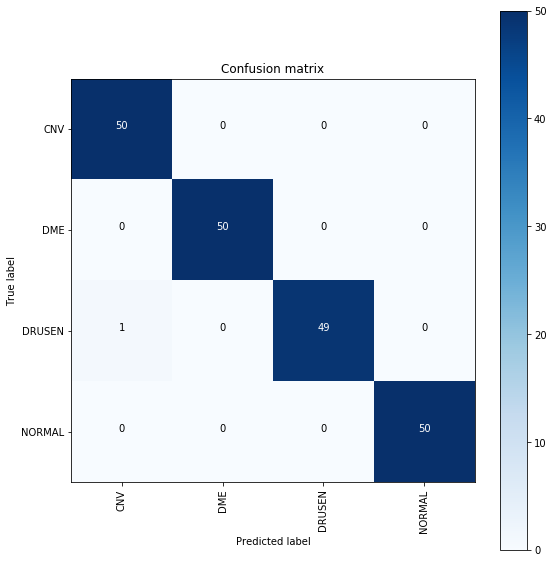

In [15]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
 
print('--------------------')
print('| Confusion Matrix |')
print('--------------------')
print('\n {}'.format(cm))
print(classification_report(Y_test, Y_pred))
# plot confusin matrix
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, classes=['CNV','DME','DRUSEN','NORMAL'], normalize=False, 
                      title='Confusion matrix', cmap = plt.cm.Blues)
plt.show()
